In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
colors = sns.color_palette("flare")

## Load Data

In [2]:
df = pd.read_csv('icpc-full.csv')
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN


## Host Country

In [3]:
host_countries = df[df.Rank == 1] .iloc[:,[0,2]].values
country_year_map = dict()

for year, country in host_countries:
    try:
        country_year_map[country] += 1
    except:
        country_year_map[country] = 1

## Host Country wrt Year

<Axes: title={'center': 'Host v/s Year'}, xlabel='Year', ylabel='Country'>

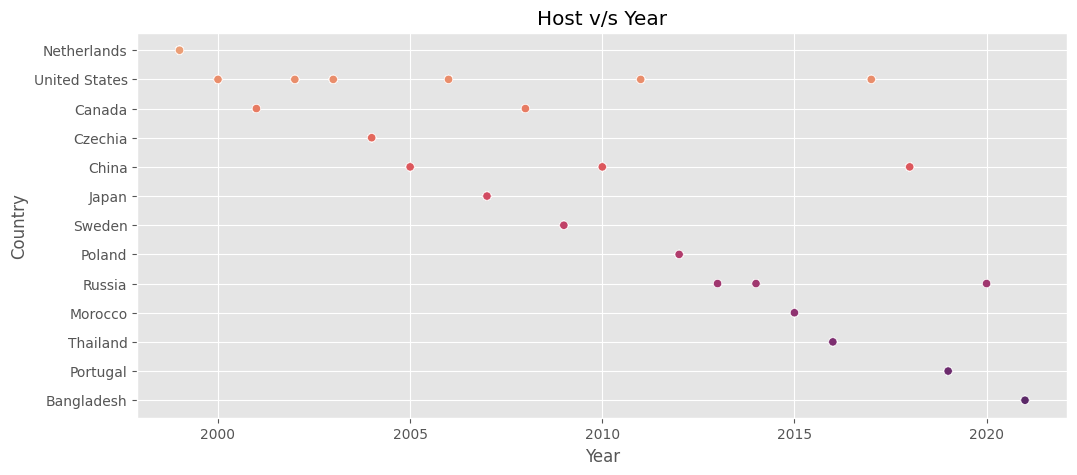

In [4]:
plt.figure(figsize=(12,5))
plt.title('Host v/s Year')
plt.xlabel('Year')
plt.ylabel('Country')
sns.scatterplot(data=df,x='Year', y='Host',hue='Host',legend=False,palette='flare')

### Host Country wrt Frequency

<Axes: title={'center': 'Host v/s Frequency'}, xlabel='Country', ylabel='Count'>

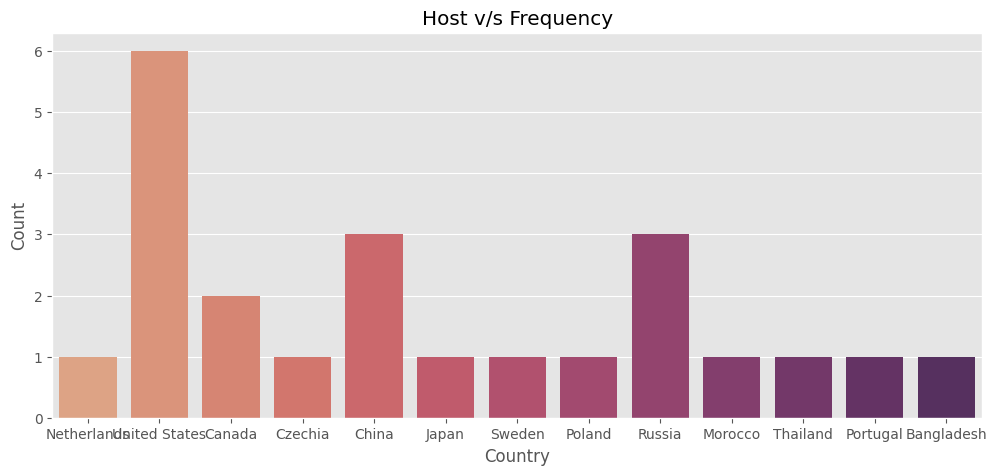

In [5]:
plt.figure(figsize=(12,5))
plt.title('Host v/s Frequency')
plt.xlabel('Country')
plt.ylabel('Count')
sns.barplot(x=list(country_year_map.keys()), y=list(country_year_map.values()),palette='flare')

## World Champions

<Axes: title={'center': 'University v/s #Won'}, xlabel='Count', ylabel='University'>

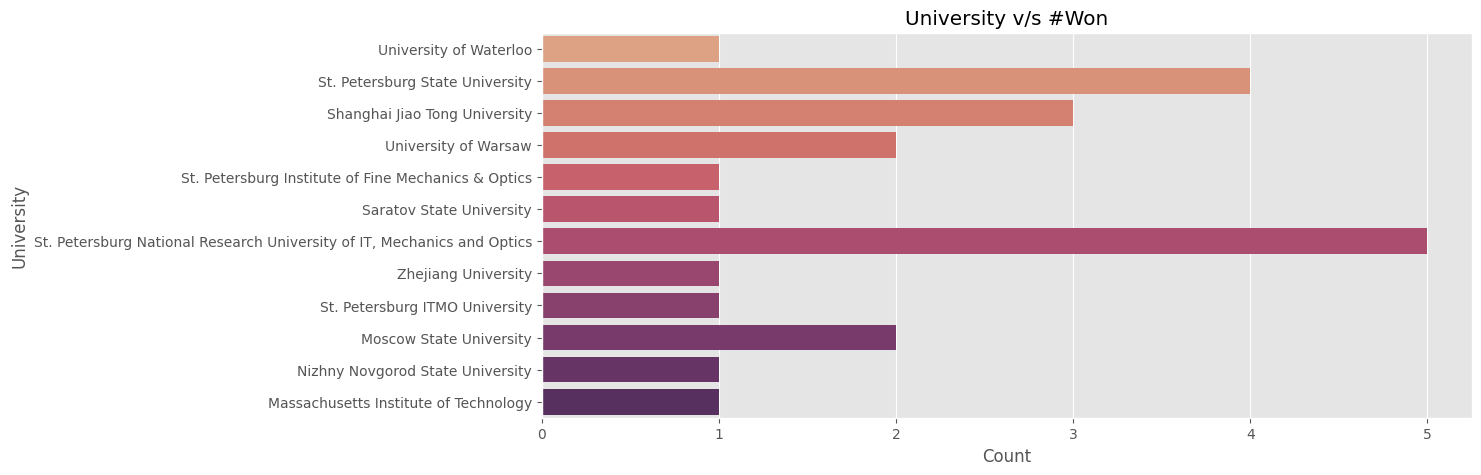

In [6]:
from collections import Counter
world_champs = df[df.Rank == 1]
univ_champs = Counter(world_champs.University)

plt.figure(figsize=(12,5))
plt.title('University v/s #Won')
plt.ylabel('University')
plt.xlabel('Count')
sns.barplot(y=list(univ_champs.keys()), x=list(univ_champs.values()),orient='h',palette='flare')

## Country v/s #Won

<Axes: title={'center': 'Country v/s #Won'}, xlabel='Count', ylabel='Country'>

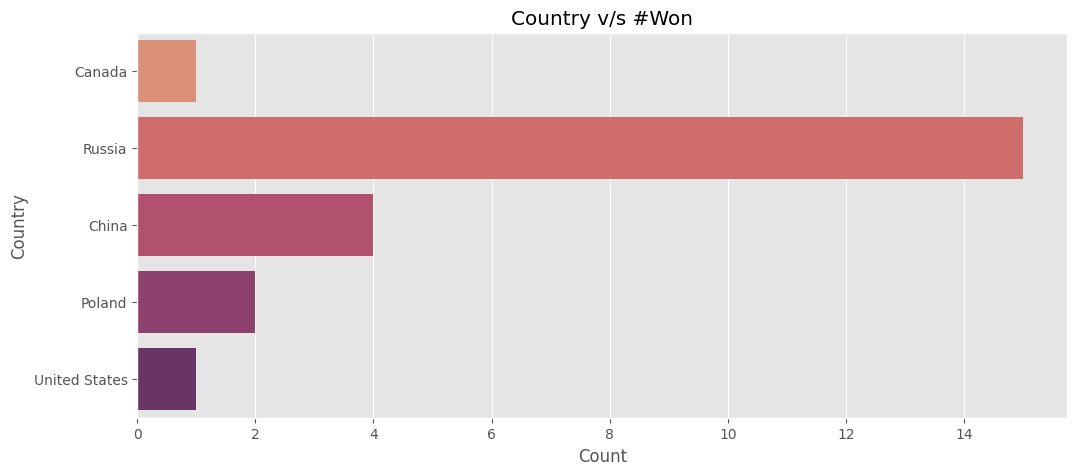

In [7]:
world_champs = df[df.Rank == 1]
univ_champs = dict(Counter(world_champs.Country))

plt.figure(figsize=(12,5))
plt.title('Country v/s #Won')
plt.ylabel('Country')
plt.xlabel('Count')
sns.barplot(x=list(univ_champs.values()),y=list(univ_champs.keys()),orient='h',palette='flare')

## Home Country Wins

<Axes: title={'center': 'Host(Won) v/s Year'}, xlabel='Year', ylabel='Country'>

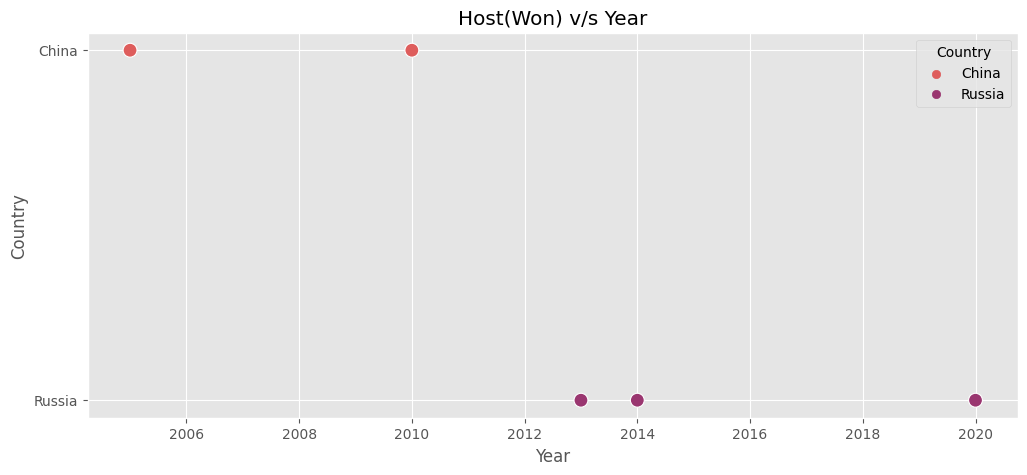

In [8]:
world_champs = df[df.Rank == 1]
world_champs = world_champs[world_champs.Host == world_champs.Country]

plt.figure(figsize=(12,5))
plt.title('Host(Won) v/s Year')
plt.xlabel('Year')
plt.ylabel('Country')
sns.scatterplot(data=world_champs,x='Year', y='Host',hue='Country',s=100,palette='flare')

## Home Country Loses

<Axes: title={'center': 'Host(Lost) v/s Year'}, xlabel='Year', ylabel='Country'>

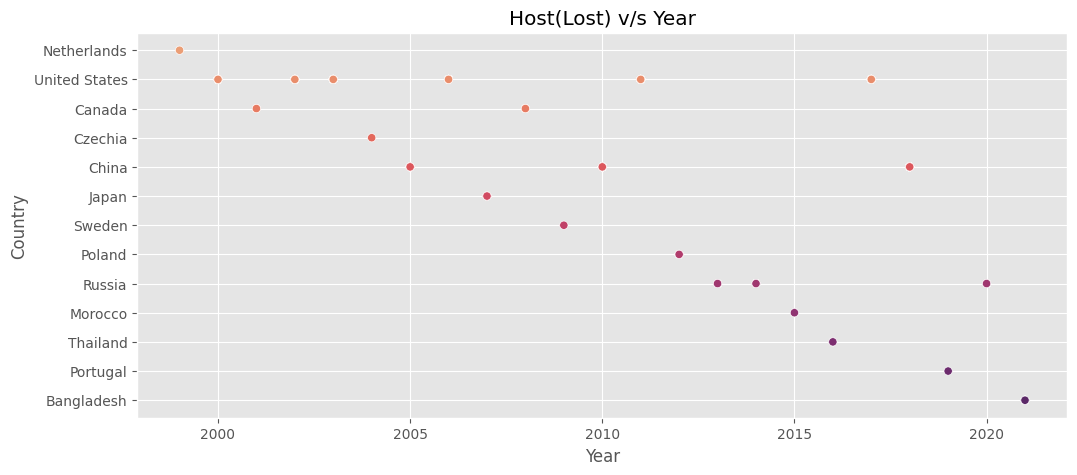

In [9]:
world_champs = df[df.Rank != 1]
world_champs = world_champs[world_champs.Host == world_champs.Country]

plt.figure(figsize=(12,5))
plt.title('Host(Lost) v/s Year')
plt.xlabel('Year')
plt.ylabel('Country')
sns.scatterplot(data=world_champs,x='Year', y='Host',hue='Host',legend=False,palette='flare')

## Rank v/s Score

<Axes: title={'center': 'Champions v/s Score'}, xlabel='Year', ylabel='Score'>

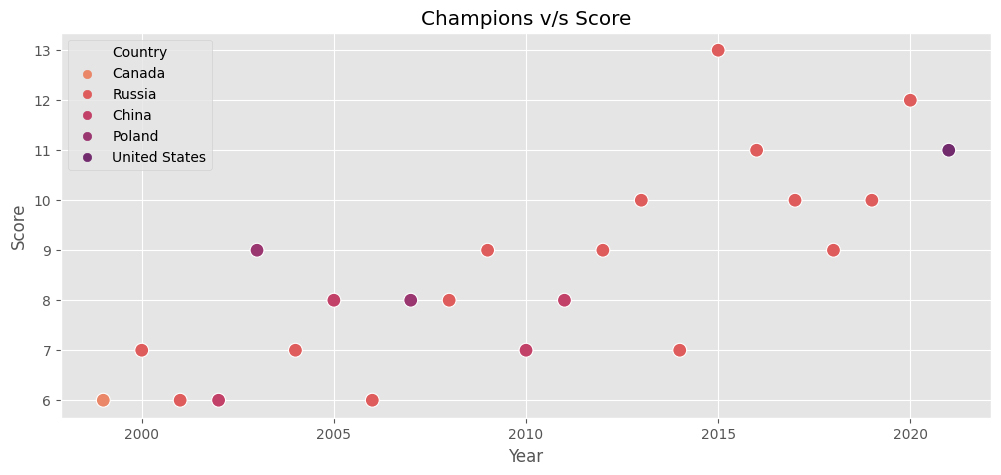

In [10]:
world_champs = df[df.Rank == 1]

plt.figure(figsize=(12,5))
plt.title('Champions v/s Score')
sns.scatterplot(data=world_champs,x='Year',y='Score',hue='Country',s=100,palette='flare')

## Score wrt Year

<Axes: title={'center': 'Score changes over Time'}, xlabel='Year', ylabel='Score'>

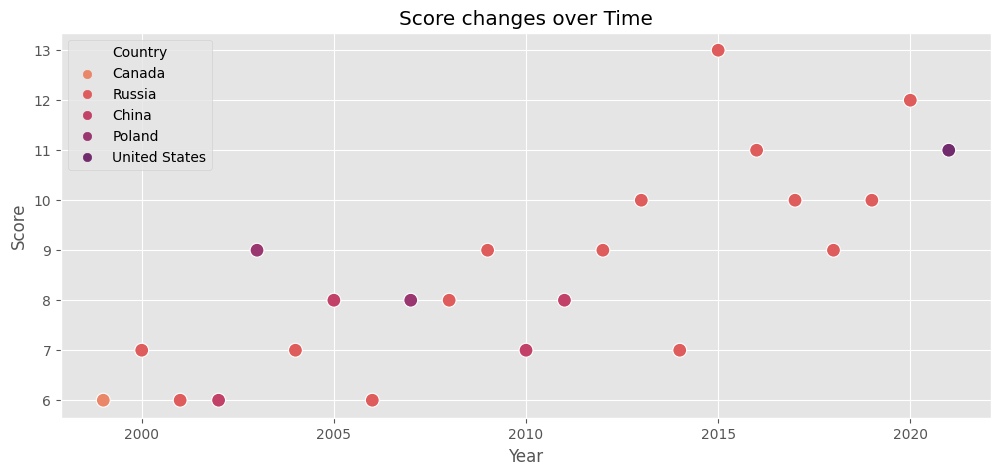

In [11]:
world_champs = df[df.Rank == 1]

plt.figure(figsize=(12,5))
plt.title('Score changes over Time')
sns.scatterplot(data=world_champs,y='Score',x='Year',hue='Country',s=100,palette='flare')

## Penalty wrt Year

<Axes: title={'center': 'Penalty changes over Time'}, xlabel='Year', ylabel='Penalty'>

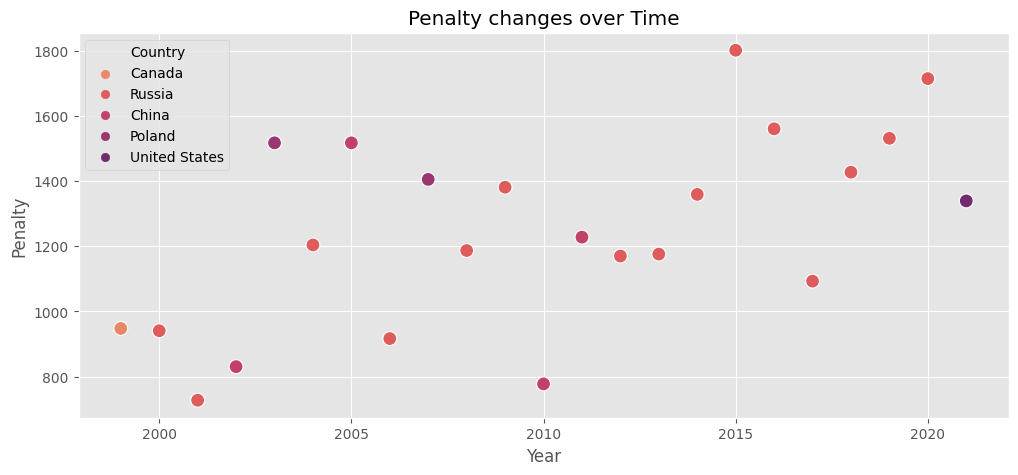

In [12]:
world_champs = df[df.Rank == 1]

plt.figure(figsize=(12,5))
plt.title('Penalty changes over Time')
sns.scatterplot(data=world_champs,y='Penalty',x='Year',hue='Country',s=100,palette='flare')